In [ ]:
import panel as pn
import numpy as np
import holoviews as hv

pn.extension(sizing_mode = 'stretch_width')

For a large variety of use cases we do not need complete control over the exact layout of each individual component on the page, as could be achieved with a [custom template](../../user_guide/Templates.ipynb), we just want to achieve a more polished look and feel. For these cases Panel ships with a number of default templates, which are defined by declaring four main content areas on the page, which can be populated as desired:

* **`header`**: The header area of the HTML page
* **`sidebar`**: A collapsible sidebar
* **`main`**: The main area of the application
* **`modal`**: A modal area which can be opened and closed from Python

These four areas behave very similarly to other Panel layout components. In particular the header, sidebar and modal behave just like the list-like `Row`/`Column` layouts while the main area behaves like a `GridSpec`. This means we can easily append new components into these areas. Unlike other layout components however, the contents of the areas is fixed once rendered. If you need a dynamic layout you should therefore insert a regular Panel layout component (e.g. a `Column` or `Row`) and modify it in place once added to one of the content areas. 

Templates can allow for us to quickly and easily create web apps for displaying our data. Panel comes with a default Template, and includes multiple Templates that extend the default which add some customization for a better display.

#### Parameters:

In addition to the four different areas we can populate, the `FastGridTemplate` also provides the parameters below:

* **`site`** (str): Name of the site. Will be shown in the header. Default is '', i.e. not shown.
* **`site_url`** (str): Url of the site and logo. Default is "/".
* **`logo`** (str): URI of logo to add to the header (if local file, logo is base64 encoded as URI).
* **`title`** (str): A title to show in the header. Also added to the document head meta settings and as the browser tab title.
* **`favicon`** (str): URI of favicon to add to the document head (if local file, favicon is base64 encoded as URI).
* **`sidebar_footer`** (str): Can be used to insert additional HTML. For example a menu, some additional info, links etc.
* **`config`** (TemplateConfig): Contains configuration options similar to `pn.config` but applied to the current Template only. (Currently only `css_files` is supported)
* **`busy_indicator`** (BooleanIndicator): Visual indicator of application busy state.

For configuring the **grid**

* **`cols`** (dict): Number of columns in the grid for different display sizes (`default={'lg': 12, 'md': 10, 'sm': 6, 'xs': 4, 'xxs': 2}`)
* **`breakpoints`** (dict): Sizes in pixels for various layouts (`default={'lg': 1200, 'md': 996, 'sm': 768, 'xs': 480, 'xxs': 0}`)
* **`row_height`** (int, default=150): Height per row in the grid
* **`dimensions`** (dict): Minimum/Maximum sizes of cells in grid units (`default={'minW': 0, 'maxW': 'Infinity', 'minH': 0, 'maxH': 'Infinity'}`)
* **`prevent_collision`** (bool, default=Flase): Prevent collisions between grid items.
* **`save_layout`** {bool, default=False): Save layout changes to localStorage.

For **styling** you can use

* **`theme`** (Theme): A Theme class (available in `panel.template`. One of `DefaultTheme` or `DarkTheme`). 
    - For convenience you can provide "default" or "dark" string to the constructor.
    - If you add `?theme=default` or `?theme=dark` in the url this will set the theme unless explicitly declared
* **`theme_toggle`** (boolean): If `True` a switch to toggle the Theme is shown. Default is `True`.
* **`background_color`** (str): Optional body background color override.
* **`neutral_color`** (str): Optional body neutral color override.
* **`accent_base_color`** (str): Optional body accent base color override. The default is <span style="color:white;background:#0072B5">#0072B5</span> (French Blue).
* **`header_background`** (str): Optional header background color override.
* **`header_color`** (str): Optional header text color override.
* **`header_neutral_color`** (str): Optional header neutral color override.
* **`header_accent_base_color`** (str): Optional header accent base color override.
* **`corner_radius`** (str): The corner radius applied to controls.
* **`font`** (str): A font url to import.
* **`font_url`** (str): A font url to import.
* **`shadow`** (str): Optional shadow override. Whether or not to apply shadow.
* **`main_layout`** (str): What to wrap the main components into. Options are '' (i.e. none) and 'card' (Default). Could be extended to Accordion, Tab etc. in the future.

The **`accent`** argument is a short cut to set both the `accent_base_color` and the `header_background`. Some accent colors that work well are <span style="color:white;background:#A01346">#A01346</span> (Fast), <span style="color:white;background:#00A170">#00A170</span> (Mint), <span style="color:white;background:#DAA520">#DAA520</span> (Golden Rod), <span style="color:white;background:#2F4F4F">#2F4F4F</span> (Dark Slate Grey), <span style="color:white;background:#F08080">#F08080</span> (Light Coral) and <span style="color:white;background:#4099da">#4099da</span> (Summer Sky).


For **layout** you can use

* **`sidebar_width`** (int): The width of the sidebar in pixels. Default is 330.
* **`main_max_width`** (str): The maximum width of the main area. For example '800px' or '80%'. If the string is '' (default) no max width is set.

For **meta** and **base** values you can use

* **`meta_description`** (str): A meta description to add to the document head for search engine optimization. For example 'P.A. Nelson'.
* **`meta_keywords`** (str): Meta keywords to add to the document head for search engine optimization.
* **`meta_author`** (str): A meta author to add to the the document head for search engine optimization. For example 'P.A. Nelson'.
* **`meta_refresh`** (str): A meta refresh rate to add to the document head. For example '30' will instruct the browser to refresh every 30 seconds. Default is '', i.e. no automatic refresh.
* **`meta_viewport`** (str): A meta viewport to add to the header.
* **`base_url`** (str): Specifies the base URL for all relative URLs in a page. Default is '', i.e. not the domain.
* **`base_target`** (str): Specifies the base Target for all relative URLs in a page. Default is _self.


________

In this case we are using the `FastGridTemplate`, built using the [Fast.design](https://www.fast.design/) framework. Here is an example of how you can set up a display using this template:

In [ ]:
ACCENT_COLOR = pn.template.FastGridTemplate.accent_base_color
XS = np.linspace(0, np.pi)

def sine(freq, phase):
    return hv.Curve((XS, np.sin(XS * freq + phase))).opts(
        responsive=True, min_height=400, title="Sine", color=ACCENT_COLOR
    ).opts(line_width=6)

def cosine(freq, phase):
    return hv.Curve((XS, np.cos(XS * freq + phase))).opts(
        responsive=True, min_height=400, title="Cosine", color=ACCENT_COLOR
    ).opts(line_width=6)

freq = pn.widgets.FloatSlider(name="Frequency", start=0, end=10, value=2)
phase = pn.widgets.FloatSlider(name="Phase", start=0, end=np.pi)

sine = pn.bind(sine, freq=freq, phase=phase)
cosine = pn.bind(cosine, freq=freq, phase=phase)

template = pn.template.FastGridTemplate(
    site="Panel", title="FastGridTemplate",
    sidebar=[pn.pane.Markdown("## Settings"), freq, phase],
)

template.main[:3, :6] = pn.pane.HoloViews(hv.DynamicMap(sine), sizing_mode="stretch_both")
template.main[:3, 6:] = pn.pane.HoloViews(hv.DynamicMap(cosine), sizing_mode="stretch_both")
template.servable();

<h3><b>FastGridTemplate with DefaultTheme</b></h3>
<img src="../../assets/FastGridTemplate.png" style="margin-left: auto; margin-right: auto; display: block;"></img>
</br>    
<h3><b>FastGridTemplate with DarkTheme</b></h3>
<img src="../../assets/FastGridTemplateDark.png" style="margin-left: auto; margin-right: auto; display: block;"></img>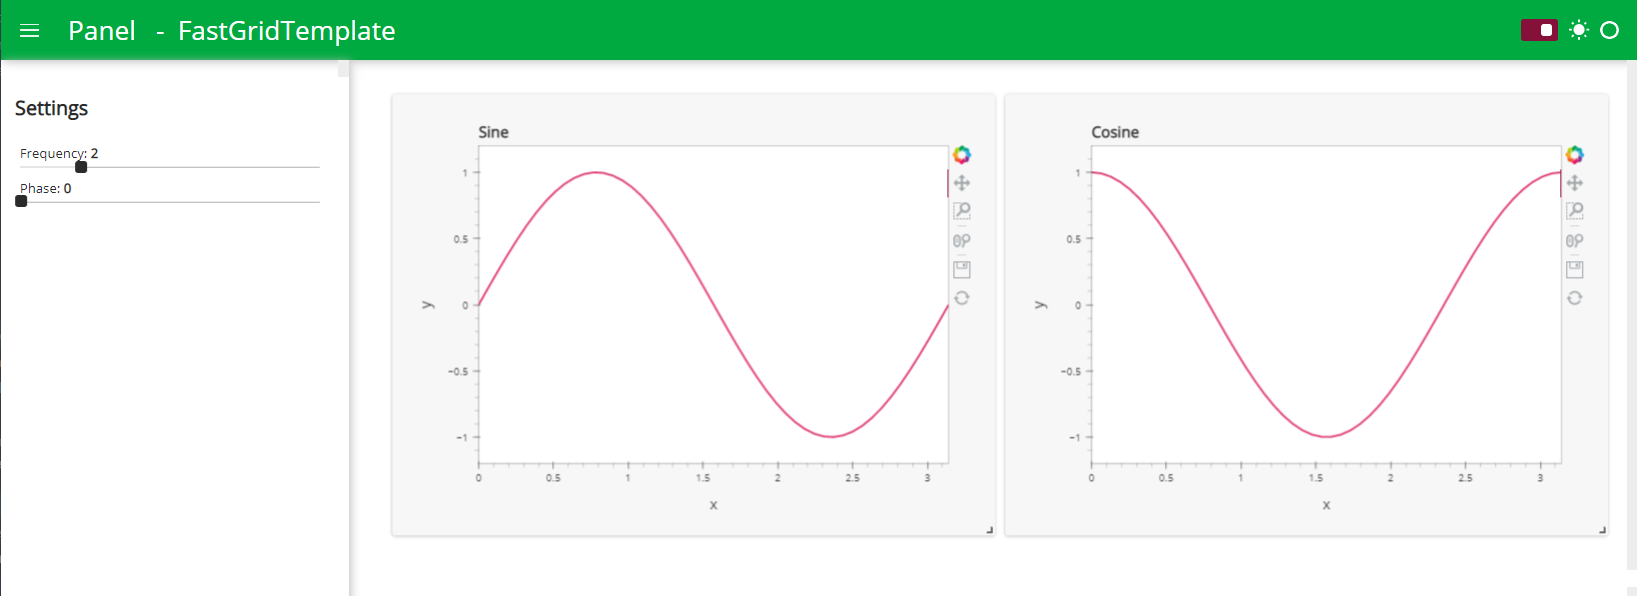

The app can be displayed within the notebook by using `.servable()`, or rendered in another tab by replacing it with `.show()`. 

Themes can be added using the optional keyword argument `theme`. This template comes with a `DarkTheme` and a `DefaultTheme`, which can be set via `FastlistTemplate(theme=DarkTheme)`. If no theme is set, then `DefaultTheme` will be applied.

It should be noted **this template currently does not render correctly in a notebook**, and for the best performance the should ideally be deployed to a server.